### Read-in downloaded data

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np

In [2]:
data = pd.read_csv("csv/2021-09-23.csv", index_col = False)
# data = pd.read_csv("csv/2021-10-01.csv", index_col = False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326586 entries, 0 to 5326585
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   viewer_id              object 
 1   broadcaster_id         object 
 2   viewer_age             float64
 3   viewer_gender          object 
 4   viewer_longitude       float64
 5   viewer_latitude        float64
 6   viewer_lang            object 
 7   viewer_country         object 
 8   broadcaster_age        float64
 9   broadcaster_gender     object 
 10  broadcaster_longitude  float64
 11  broadcaster_latitude   float64
 12  broadcaster_lang       object 
 13  broadcaster_country    object 
 14  duration               int64  
 15  viewer_network         object 
 16  broadcaster_network    object 
dtypes: float64(6), int64(1), object(10)
memory usage: 690.9+ MB


In [4]:
data.describe()

,viewer_age,viewer_longitude,viewer_latitude,broadcaster_age,broadcaster_longitude,broadcaster_latitude,duration
count,5.326586e+06,5.301525e+06,5.314196e+06,5.326586e+06,5.326586e+06,5.326586e+06,5.326586e+06
mean,3.419285e+01,-3.916831e+01,3.020641e+01,3.096484e+01,-4.521882e+01,3.083328e+01,8.125876e+02
std,9.755865e+00,7.968983e+01,2.000294e+01,7.895971e+00,7.882566e+01,1.837510e+01,3.510942e+03
min,1.800000e+01,-1.781194e+02,-8.900000e+01,1.800000e+01,-1.707419e+02,-5.430840e+01,4.600000e+01
25%,2.700000e+01,-9.020000e+01,2.615060e+01,2.500000e+01,-9.430000e+01,2.710000e+01,9.100000e+01
50%,3.200000e+01,-7.700140e+01,3.528440e+01,3.000000e+01,-7.890060e+01,3.509390e+01,1.680000e+02
75%,3.900000e+01,4.000000e-01,4.175210e+01,3.500000e+01,-2.000000e+00,4.169440e+01,4.570000e+02
max,2.000000e+02,1.802740e+02,9.100000e+01,1.230000e+02,1.794740e+02,7.570000e+01,5.157950e+05


In [5]:
data["viewer_country"].unique()

array(['ES', 'US', 'BR', 'TH', 'CA', 'ID', 'TR', 'AE', 'FR', 'GB', 'KR',
       'IT', 'KW', 'AU', 'IN', 'AR', 'TW', 'VN', 'SA', 'PH', 'CL', 'SG',
       'MY', 'MX', 'SY', 'PE', 'NL', 'IQ', 'HK', 'AS', 'JP', 'EN', 'DE',
       'NZ', 'EC', 'PT', 'RO', 'BH', 'DO', 'PR', 'EG', 'QA', 'IL', 'IR',
       'RU', 'CN', 'VE', 'UM', 'ZA', 'CR', 'LU', 'CO', 'CH', 'NG', 'MA',
       'LB', 'PA', 'OM', 'IE', 'VG', 'SE', 'MM', 'JO', 'TN', 'MK', '419',
       'DZ', 'AI', 'BG', 'AL', 'BO', 'DK', 'JM', nan, 'GR', 'ZG', 'MO',
       'PK', 'NO', 'HR', 'GT', 'PL', 'AF', 'LY', 'HN', 'XL', 'MP', 'AD',
       'BE', 'SV', 'BZ', 'SD', 'NP', 'LA', 'BA', 'AO', 'YE', 'IS', 'KE',
       'CY', 'SK', 'AT', 'KH', 'UY', 'GE', 'NI', 'DM', 'AG', 'RS', 'LK',
       'FI', 'GL', 'BD', 'GH', 'AX', 'PS', 'IM', 'SX', 'TT', 'ZM', 'AW',
       'CX', 'ET', 'KY', 'GW', 'BN', 'BW', 'MZ', 'MU', 'MV', 'XK', 'SC',
       'PY', 'TC', 'SN', 'GU', 'AZ', 'ME', 'EE', 'MT', 'BY', 'GN', 'CZ',
       'MR', 'UG', 'UK', 'HT', 'GM', 'UZ', 'CM', 'C

In [6]:
res = data["viewer_country"].value_counts().reset_index().sort_values("viewer_country", ascending=False).head(20)
top_country = res['index'].to_list()
data[data['viewer_country'].isin(top_country)].groupby(['viewer_country']).size().to_frame('size').sort_values('size', ascending=False).reset_index()

,viewer_country,size
0,US,4203399
1,BR,197785
2,GB,130742
3,ES,121037
4,ID,89382
5,TH,87478
6,TR,76471
7,TW,69193
8,AU,40268
9,PH,34801


### Missing viewer latitude and longitude data

In [7]:
missing_values = data.isnull().values.any()
missing_values

True

In [8]:
data[data.isnull().any(axis=1)]

,viewer_id,broadcaster_id,viewer_age,viewer_gender,viewer_longitude,viewer_latitude,viewer_lang,viewer_country,broadcaster_age,broadcaster_gender,broadcaster_longitude,broadcaster_latitude,broadcaster_lang,broadcaster_country,duration,viewer_network,broadcaster_network
41,22 48 53 2a 4e 7e 94 31 e5 15 4b 2f 16 c3 b8 c1,b9 7c 53 31 7c 6f d7 5a e0 24 cb fa 1f 4d 7b e7,29.0,male,NaN,52.6,en,US,28.0,female,0.962200,52.5182,en,GB,2253,pof,meetme
68,d8 e2 43 b0 6f 36 c2 f3 f0 15 36 30 b9 3d 5c 41,d3 bb ed 4a 94 37 39 9e 9e df c1 21 3b 74 ba d6,27.0,male,NaN,52.6,en,US,26.0,female,-2.436000,56.3781,en,GB,50,pof,meetme
779,25 e1 c4 6a 33 e2 8d e4 22 85 ab cf cf c3 02 b6,6f 54 9e 4d 78 f8 de fe 91 5a 5c ac 02 f6 58 30,24.0,male,NaN,52.3,en,US,27.0,female,-0.600000,52.3000,en,GB,592,pof,pof
947,df 27 53 dc 21 ae f5 46 cf db 23 eb 2b 42 2a a9,35 39 29 4c bb 42 fd 0d 65 00 a7 ef 89 48 31 11,35.0,male,NaN,52.6,en,US,25.0,female,1.315600,51.4817,en,GB,919,pof,meetme
1381,ff 39 c5 25 fd 9f b8 b2 25 0c 91 7c f5 23 80 fa,48 95 45 35 83 31 4e e6 15 04 93 60 30 1a 10 47,39.0,male,NaN,NaN,en,US,35.0,female,1.000000,1.0000,en,GB,144,pof,pof
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5325971,4b 90 04 ee a0 80 89 1d a4 86 0e 5e 39 ea 25 bd,a6 9a d3 8e 99 4f 45 19 bb 46 b7 e8 a6 cf 38 89,56.0,male,NaN,NaN,en,US,23.0,female,121.002998,15.2880,en,PH,81,pof,skout
5326114,cb 30 00 64 9c c7 61 a3 61 24 00 e7 e1 f7 cf 86,2c cf 1a 3c 53 73 d7 ff 84 63 80 9d 16 5a 98 b6,29.0,male,NaN,NaN,en,US,27.0,female,-114.162900,37.1830,en,US,116,pof,meetme
5326253,03 c1 7b 5d 46 2a 77 3a d2 68 a3 55 41 c6 2f c1,65 e2 f9 ce 2b 52 9d 60 95 f4 09 72 bc 21 f0 f0,44.0,male,NaN,NaN,en,US,60.0,female,-79.549400,44.5339,en,CA,277,pof,meetme
5326297,b4 cf a0 53 0d 54 56 01 63 83 a2 e4 92 89 43 ac,ef 82 5f 1e 82 61 81 b0 06 a4 b3 43 34 0e 69 0a,41.0,male,NaN,51.9,en,US,36.0,female,0.500000,51.9000,en,GB,237,pof,pof


### Clustering for viewer_latitude nd viewer_longitude

In [9]:
sample = data.sample(frac=0.2)

In [10]:
df_geo = sample[['viewer_latitude', 'viewer_longitude']]

In [11]:
df_geo.head()

,viewer_latitude,viewer_longitude
111100,56.909400,-4.432400
3236697,32.691999,-106.433998
943201,44.782700,12.256100
1540563,38.600000,-77.500000
3468452,41.675999,-83.730003


In [12]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065317 entries, 111100 to 5158516
Data columns (total 2 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   viewer_latitude   1062790 non-null  float64
 1   viewer_longitude  1060308 non-null  float64
dtypes: float64(2)
memory usage: 24.4 MB


In [13]:
missing_values = df_geo.isnull().values.any()
missing_values

True

In [14]:
df_geo[df_geo.isnull().any(axis=1)]

,viewer_latitude,viewer_longitude
2417995,52.5,NaN
5050974,51.5,NaN
4118712,NaN,NaN
918922,NaN,NaN
472279,52.6,NaN
...,...,...
1484502,NaN,NaN
3202661,52.4,NaN
2208528,51.5,NaN
183168,51.5,NaN


In [15]:
df_geo.dropna(inplace=True)

/Users/lhuang/opt/miniconda3/envs/tensorflow3.7/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
data_train = df_geo.values.astype('float32')

In [17]:
data_train

array([[  56.9094,   -4.4324],
       [  32.692 , -106.434 ],
       [  44.7827,   12.2561],
       ...,
       [  32.7723, -106.3348],
       [  14.2722,  122.0819],
       [  53.4   ,   -0.9   ]], dtype=float32)

### The Elbow Method

In [18]:
from sklearn.cluster import KMeans

Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

In [61]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k, verbose = 0, n_init=32, random_state=2021).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
        sse.append(curr_sse)
    return sse

In [62]:
res = calculate_WSS(data_train, 20)
len(res)
df = pd.DataFrame({'k': list(range(2, 21)), 'sse': res[1:]})

In [75]:
df.to_csv("df.csv", index=False)

In [2]:
df = pd.read_csv("df.csv")

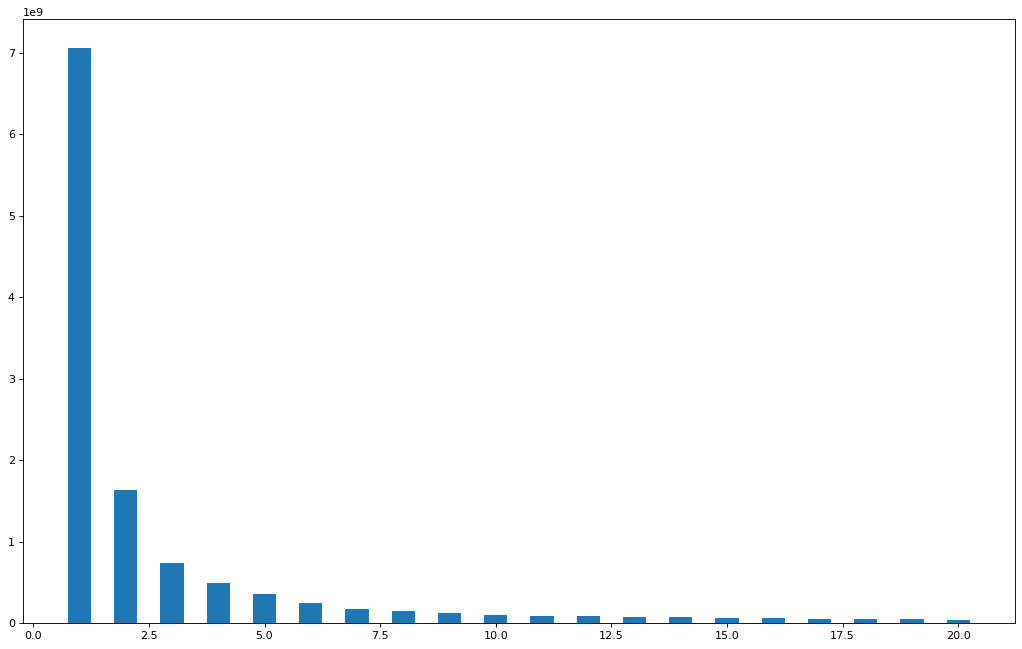

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['k'], df['sse'], width=0.5)
plt.show()

### Investigate number of clusters

In [18]:
from sklearn.cluster import KMeans

In [19]:
data_wo = data.dropna()

Computing K-Means with 5 clusters...


/Users/lhuang/opt/miniconda3/envs/tensorflow3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Visualizing K-Means with 5 clusters


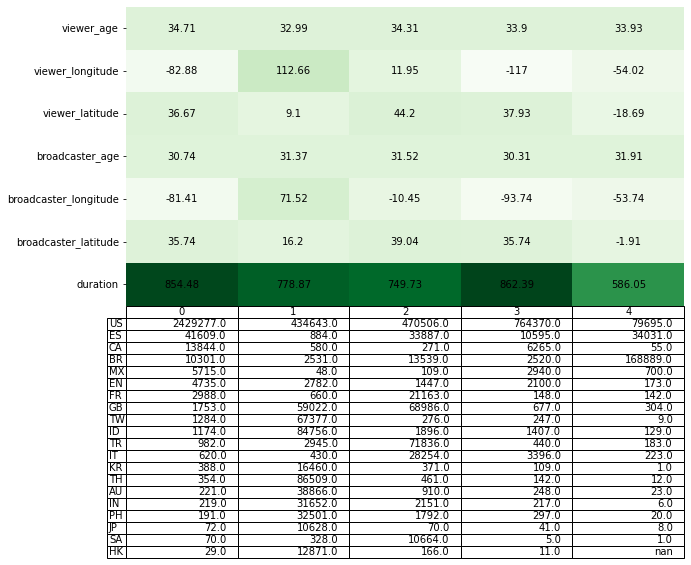

Computing K-Means with 6 clusters...


/Users/lhuang/opt/miniconda3/envs/tensorflow3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Visualizing K-Means with 6 clusters


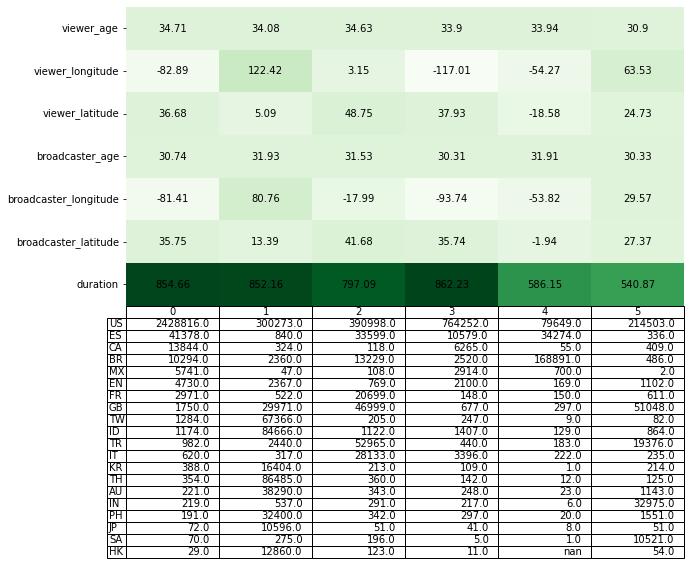

Computing K-Means with 7 clusters...


/Users/lhuang/opt/miniconda3/envs/tensorflow3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Visualizing K-Means with 7 clusters


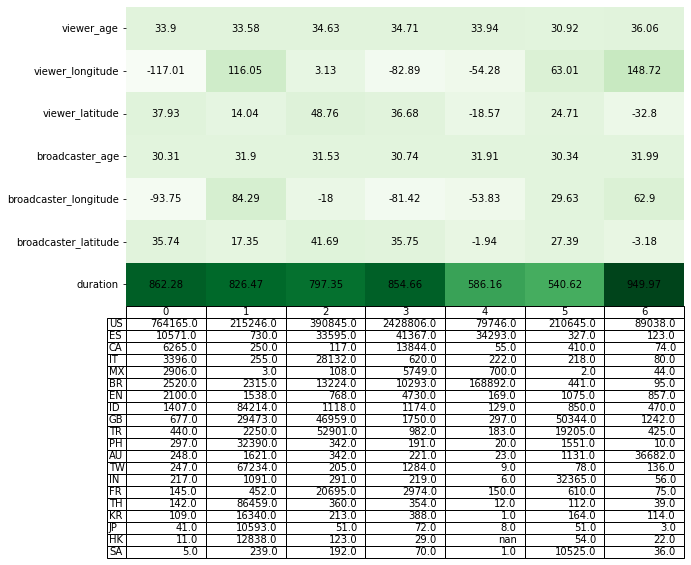

Computing K-Means with 8 clusters...


/Users/lhuang/opt/miniconda3/envs/tensorflow3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Visualizing K-Means with 8 clusters


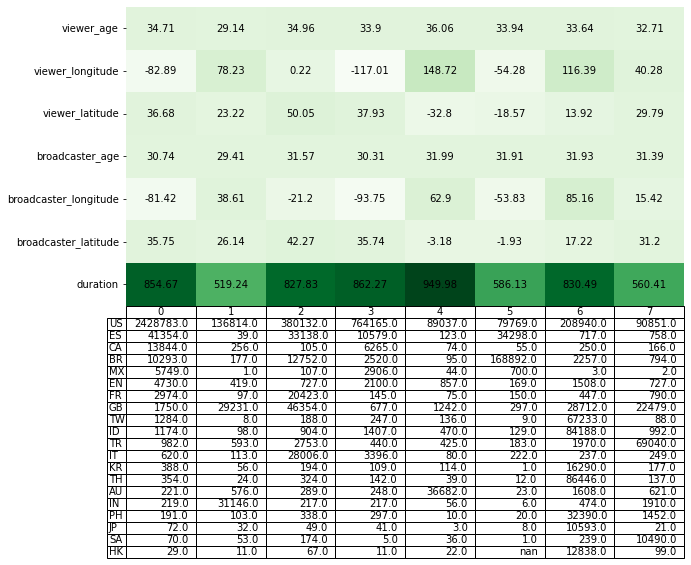

Computing K-Means with 9 clusters...


/Users/lhuang/opt/miniconda3/envs/tensorflow3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Visualizing K-Means with 9 clusters


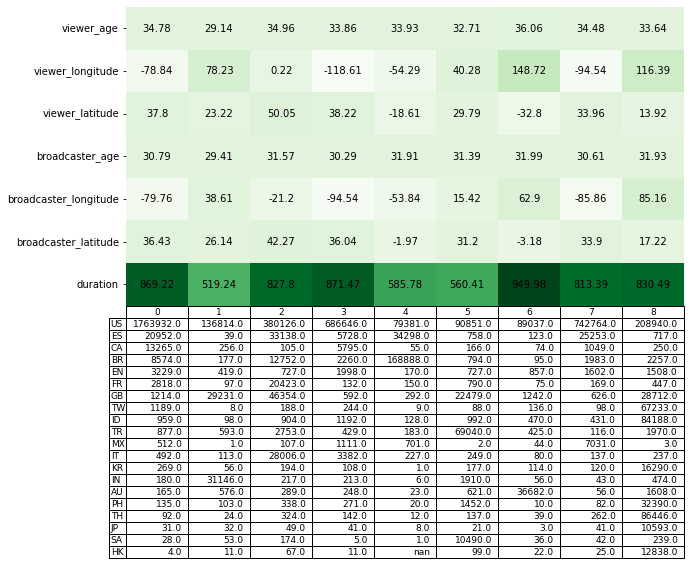

Computing K-Means with 10 clusters...


/Users/lhuang/opt/miniconda3/envs/tensorflow3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Visualizing K-Means with 10 clusters


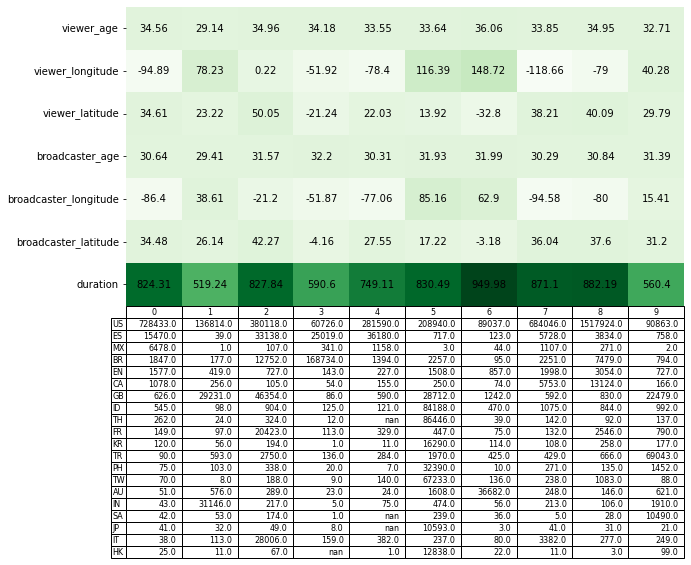

In [21]:
for k in range(5, 11):
    print('Computing K-Means with %s clusters...' % k)
    kmeans = KMeans(n_clusters = k, verbose = 0, n_init=32, random_state=2021).fit(data_train)
    data_wo['label'] = kmeans.fit_predict(data_wo[['viewer_latitude', 'viewer_longitude']])

    print('Visualizing K-Means with %s clusters' % k)
    plot_data=data_wo.groupby(['label']).mean().reset_index(drop=True)
    plot_data_viewer_top_country = data_wo[data_wo['viewer_country'].isin(top_country)].groupby(['label'])['viewer_country'].value_counts()
    sort_index = plot_data.index
    for i in sort_index:
        mx_plot_data_viewer_top_country = plot_data_viewer_top_country[i] if i == sort_index[0] else pd.concat((mx_plot_data_viewer_top_country, plot_data_viewer_top_country[i]), axis=1)
    mx_plot_data_viewer_top_country.columns = sort_index

    f, ax = plt.subplots(figsize=(10, 5.5))
    sns.heatmap(plot_data.T.round(2), annot = False, cmap = 'Greens', cbar = False)
    sns.heatmap(plot_data.T.round(2), annot = True, alpha = 0.0, annot_kws={"color": 'black'}, cbar = False, fmt='g')
    plt.yticks(rotation = 0)
    plt.xticks([])
    plt.table(cellText=mx_plot_data_viewer_top_country.values, rowLabels=mx_plot_data_viewer_top_country.index, colLabels = mx_plot_data_viewer_top_country.columns, loc='bottom')
    plt.show()
    plt.close()

### Output centroids

In [20]:
k = 8
print('Computing K-Means with %s clusters...' % k)
kmeans = KMeans(n_clusters = k, verbose = 0, n_init=32, random_state=2021).fit(data_train)
# results[k] = kmeans

data_wo['label'] = kmeans.fit_predict(data_wo[['viewer_latitude', 'viewer_longitude']])

Computing K-Means with 8 clusters...


/Users/lhuang/opt/miniconda3/envs/tensorflow3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
def classify(centroids, datapoint):
    dists = np.sum((centroids - datapoint)**2, axis=1)
    return np.argmin(dists)
# data_wo['label'] = data_wo.apply(lambda x: classify(centroids, [x['viewer_latitude'], x['viewer_longitude']]), axis = 1)

In [21]:
data_viewer_gender = data_wo.groupby('label')['viewer_gender'].value_counts()
data_viewer_gender/sum(data_viewer_gender)

label  viewer_gender
0      male             0.380354
       female           0.096045
1      male             0.033754
       female           0.004339
2      male             0.085181
       female           0.018544
3      male             0.119057
       female           0.031255
4      male             0.020351
       female           0.004770
5      male             0.044567
       female           0.011629
6      male             0.078351
       female           0.029009
7      male             0.037088
       female           0.005705
Name: viewer_gender, dtype: float64

In [26]:
data_viewer_network = data_wo.groupby(['label'])['viewer_network'].value_counts()
data_viewer_network/sum(data_viewer_network)

label  viewer_network
0      pof               2.088183e-01
       meetme            1.949509e-01
       skout             6.570911e-02
       zoosk             6.920739e-03
1      skout             1.960480e-02
       meetme            1.823763e-02
       pof               2.393682e-04
       zoosk             1.094039e-05
2      pof               4.672470e-02
       meetme            3.608046e-02
       skout             2.062622e-02
       zoosk             2.933156e-04
3      meetme            6.868810e-02
       pof               5.526311e-02
       skout             2.395398e-02
       zoosk             2.406697e-03
4      pof               1.073139e-02
       skout             8.152476e-03
       meetme            5.799160e-03
       zoosk             4.385587e-04
5      meetme            2.920933e-02
       skout             2.432935e-02
       pof               2.657949e-03
       zoosk             1.886274e-07
6      skout             6.657472e-02
       meetme            4.0

In [38]:
print('Visualizing K-Means with %s clusters' % k)

data_viewer_age = data_wo.groupby(['label'])['viewer_age'].mean()
data_viewer_latitude = data_wo.groupby(['label'])['viewer_latitude'].mean()
data_viewer_longtitude = data_wo.groupby(['label'])['viewer_longitude'].mean()
data_broadcaster_age = data_wo.groupby(['label'])['broadcaster_age'].mean()
data_broadcaster_latitude = data_wo.groupby(['label'])['broadcaster_latitude'].mean()
data_broadcaster_longitude = data_wo.groupby(['label'])['broadcaster_longitude'].mean()
data_duration = data_wo.groupby(['label'])['duration'].mean()

data_broadcaster_gender = data_wo.groupby(['label'])['broadcaster_gender'].value_counts()
data_broadcaster_lang = data_wo.groupby(['label'])['broadcaster_lang'].value_counts()
data_broadcaster_country = data_wo.groupby(['label'])['broadcaster_country'].value_counts()
data_braodcaster_network = data_wo.groupby(['label'])['broadcaster_network'].value_counts()

Visualizing K-Means with 5 clusters


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Visualizing K-Means with 8 clusters


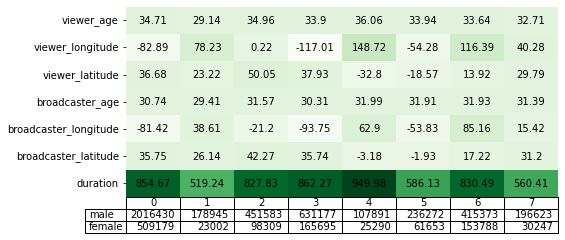

In [28]:
print('Visualizing K-Means with %s clusters' % k)
plot_data=data_wo.groupby(['label']).mean().reset_index(drop=True)
plot_data_viewer_gender = data_wo.groupby('label')['viewer_gender'].value_counts()
sort_index = plot_data.index

for i in sort_index:
    mx_plot_data_viewer_gender = plot_data_viewer_gender[i] if i == sort_index[0] else pd.concat((mx_plot_data_viewer_gender, plot_data_viewer_gender[i]), axis=1)
mx_plot_data_viewer_gender.columns = sort_index

f, ax = plt.subplots(figsize=(10, 5.5))
sns.heatmap(plot_data.T.round(2), annot = False, cmap = 'Greens', cbar = False)
sns.heatmap(plot_data.T.round(2), annot = True, alpha = 0.0, annot_kws={"color": 'black'}, cbar = False, fmt='g')
plt.yticks(rotation = 0)
plt.xticks([])
plt.subplots_adjust(left = 0.3, bottom = 0.4)
plt.table(cellText=mx_plot_data_viewer_gender.values, rowLabels=mx_plot_data_viewer_gender.index, colLabels = mx_plot_data_viewer_gender.columns, loc='bottom')
plt.show()
plt.close()

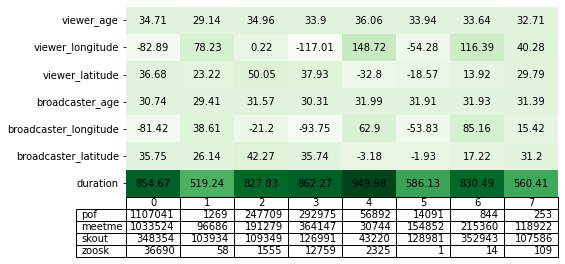

In [29]:
plot_data_viewer_network = data_wo.groupby('label')['viewer_network'].value_counts()
sort_index = plot_data.index

for i in sort_index:
    mx_plot_data_viewer_network = plot_data_viewer_network[i] if i == sort_index[0] else pd.concat((mx_plot_data_viewer_network, plot_data_viewer_network[i]), axis=1)
mx_plot_data_viewer_network.columns = sort_index

f, ax = plt.subplots(figsize=(10, 5.5))
sns.heatmap(plot_data.T.round(2), annot = False, cmap = 'Greens', cbar = False)
sns.heatmap(plot_data.T.round(2), annot = True, alpha = 0.0, annot_kws={"color": 'black'}, cbar = False, fmt='g')
plt.yticks(rotation = 0)
plt.xticks([])
plt.subplots_adjust(left = 0.3, bottom = 0.4)
plt.table(cellText=mx_plot_data_viewer_network.values, rowLabels=mx_plot_data_viewer_network.index, colLabels = mx_plot_data_viewer_gender.columns, loc='bottom')
plt.show()
plt.close()


In [38]:
centroids = data_wo[['label', 'viewer_latitude', 'viewer_longitude']].groupby(['label']).mean().reset_index(drop=True)

In [39]:
centroids

,viewer_latitude,viewer_longitude
0,36.681477,-82.891027
1,23.222433,78.230275
2,50.049977,0.223793
3,37.930945,-117.007414
4,-32.795865,148.715917
5,-18.570548,-54.280256
6,13.921140,116.387403
7,29.789511,40.279516


In [40]:
centroids.to_csv("viewer_lat_long_centroids.csv", index=False)